In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, precision_recall_curve,
                             average_precision_score, matthews_corrcoef, log_loss)
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


In [3]:
current_dir = Path.cwd()
data_dir = current_dir.parent / 'data' / 'processed' 
file_path = data_dir / 'Obesity_data_processed.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [4]:
df.head()

,Province,Sex,Marital_status,Age,Working_12_months,Education_level,Perceived_life_stress,Obese_or_not,Smoker,Drinker_12_months,Physical_activity,Has_regular_healthcare_provider,Immigrant,Cultural_racial_background,Food_security,Personal_income
0,NB,Female,Married,45 - 49,Yes,Post-secondary diploma or uni degree,Quite a bit stressful,Not obese,Not at all,Regular drinker,At/above rec'd level from CPAG,Yes,Canadian born,White,Food secure,"$20,000 - $39,999"
1,BC,Female,Widow/Divorced/Sep,50 - 54,Yes,Post-secondary diploma or uni degree,Not at all stressful,Obese,Not at all,Regular drinker,At/above rec'd level from CPAG,Yes,Immigrant,Non-white (other visible minority),Food secure,"$60,000 - $79,999"
2,ON,Female,Married,45 - 49,Yes,Post-secondary diploma or uni degree,A bit stressful,Not obese,Not at all,Regular drinker,Below rec'd level from CPAG,Yes,Canadian born,White,Food secure,"$60,000 - $79,999"
3,QUE,Female,Common-law,30 - 34,No,Post-secondary diploma or uni degree,Not at all stressful,Not obese,Occasionally,Regular drinker,Below rec'd level from CPAG,Yes,Canadian born,White,Food secure,"$80,000 or more"
4,QUE,Female,Common-law,45 - 49,Yes,Post-secondary diploma or uni degree,Not very stressful,Not obese,Not at all,Regular drinker,At/above rec'd level from CPAG,Yes,Canadian born,White,Food secure,"$60,000 - $79,999"


In [5]:
# Checking if dataset is unbalanced
class_distribution = df['Obese_or_not'].value_counts()
print(class_distribution)

Not obese    41906
Obese        19014
Name: Obese_or_not, dtype: int64


In [6]:
# Separate the target variable
y = df['Obese_or_not']

# Drop the target variable from the features DataFrame
X = df.drop('Obese_or_not', axis=1)

In [7]:
ordinal_features = ['Province', 'Sex', 'Marital_status', 'Age', 'Working_12_months', 'Education_level', 
                    'Perceived_life_stress', 'Smoker', 'Drinker_12_months', 'Physical_activity', 
                    'Has_regular_healthcare_provider', 'Immigrant', 'Cultural_racial_background', 
                    'Food_security', 'Personal_income']

feature_orders = {
    'Province': ['NB', 'BC', 'ON', 'QUE', 'MN', 'AB', 'NL', 'PEI', 'NS', 'SASK'],
    "Sex": ["Female", "Male"],
    'Marital_status': ['Single', 'Common-law', 'Widow/Divorced/Sep', 'Married'],
    'Age': ['25 - 29', '20 - 24', '55 - 59', '35 - 39', '60 - 64', '40 - 44', '30 - 34', '50 - 54', '45 - 49'],
    'Working_12_months': ['Yes', 'No'],
    'Education_level': ['Less than secondary school graduation', 'Secondary school graduation only', 'Post-secondary diploma or uni degree'],
    'Perceived_life_stress': ['Not at all stressful', 'Not very stressful', 'A bit stressful', 'Quite a bit stressful', 'Extremely stressful'],
    'Smoker': ['Not at all', 'Occasionally', 'Daily'],
    'Drinker_12_months': ['Did not drink in the last 12 months', 'Occasional drinker', 'Regular drinker'],
    'Physical_activity': ["At/above rec'd level from CPAG", "Below rec'd level from CPAG", 'No physical activity'],
    'Has_regular_healthcare_provider': ['Yes', 'No'],
    'Immigrant': ['Immigrant', 'Canadian born'],
    'Cultural_racial_background': ['White', 'Non-white (other visible minority)', 'Aboriginal'],
    'Food_security': ['Food secure', 'Moderately food insecure', 'Severely food insecure'],
    'Personal_income': ['No income or income loss', 'Less than $20,000', '$20,000 - $39,999', '$40,000 - $59,999', '$60,000 - $79,999', '$80,000 or more']
}


X_ordinal = pd.DataFrame(df[ordinal_features])

categories_order = [feature_orders[feature] for feature in ordinal_features]

encoder = OrdinalEncoder(categories=categories_order)
X_ordinal_encoded = encoder.fit_transform(X_ordinal)
X_ordinal_encoded_df = pd.DataFrame(X_ordinal_encoded, columns=[f'{feat}_encoded' for feat in ordinal_features])

X_ordinal_encoded_df.head()

,Province_encoded,Sex_encoded,Marital_status_encoded,Age_encoded,Working_12_months_encoded,Education_level_encoded,Perceived_life_stress_encoded,Smoker_encoded,Drinker_12_months_encoded,Physical_activity_encoded,Has_regular_healthcare_provider_encoded,Immigrant_encoded,Cultural_racial_background_encoded,Food_security_encoded,Personal_income_encoded
0,0.0,0.0,3.0,8.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.0,0.0,2.0,7.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0
2,2.0,0.0,3.0,8.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0
3,3.0,0.0,1.0,6.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,5.0
4,3.0,0.0,1.0,8.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_ordinal_encoded_df, y, test_size=0.2, random_state=42)

In [38]:
model = DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.5884766907419566
Classification Report:
              precision    recall  f1-score   support

   Not obese       0.71      0.69      0.70      8356
       Obese       0.35      0.38      0.37      3828

    accuracy                           0.59     12184
   macro avg       0.53      0.53      0.53     12184
weighted avg       0.60      0.59      0.59     12184

ROC AUC: 0.5320389355998705
Matthews Correlation Coefficient: 0.06160435343615464
Log Loss: 12.350198587325682


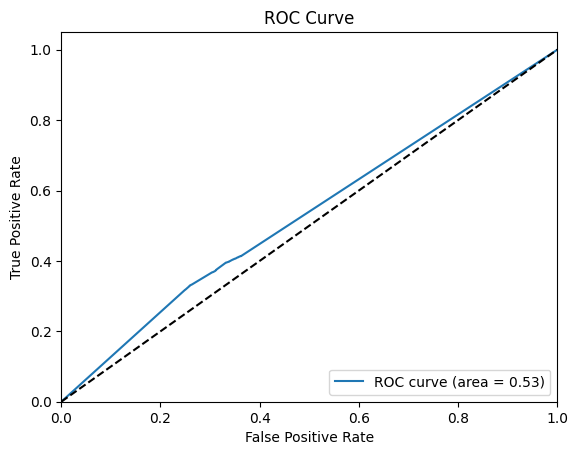

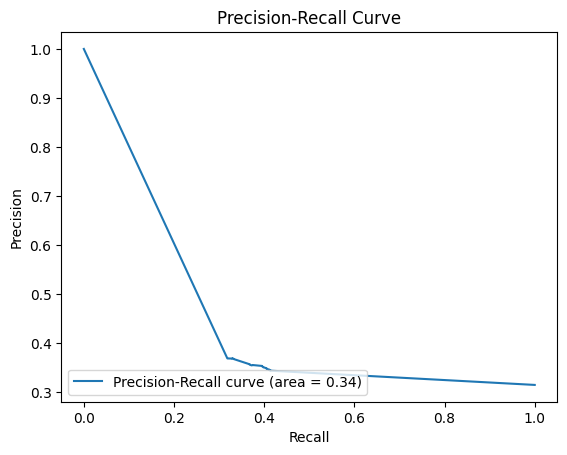

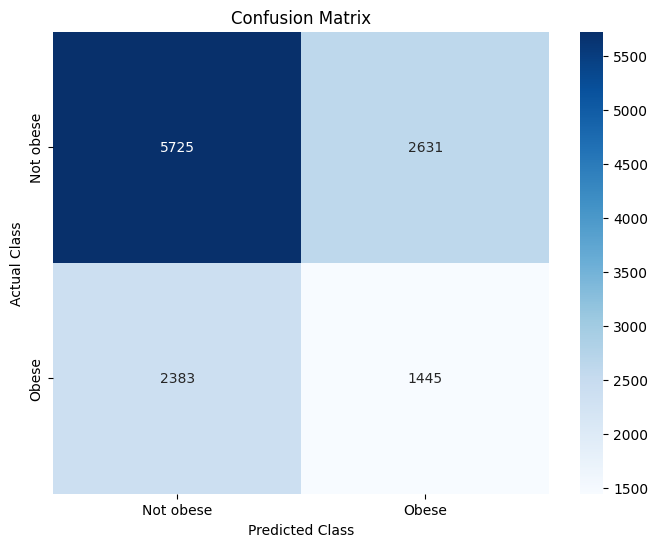

In [40]:
# First Model

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class Obese

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Obese')
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label='Obese')
avg_precision = average_precision_score(y_test, y_pred_proba, pos_label='Obese')

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# Log Loss (Cross-Entropy Loss)
cross_entropy_loss = log_loss(y_test, y_pred_proba)

# Feature Importance Scores
feature_importances = model.feature_importances_

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{clf_report}')
print(f'ROC AUC: {roc_auc}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Log Loss: {cross_entropy_loss}')

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# COnfusion maitrx and heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Metrics:

Accuracy: An accuracy of 60.14% is moderately better than a random guess, but it shows there is significant room for improvement.

ROC AUC: An AUC of 0.528 is just slightly better than a random model (which would have an AUC of 0.5). This suggests the model has limited ability to discriminate between the positive and negative classes.

Matthews Correlation Coefficient (MCC): An MCC close to 0 indicates that the model is not doing much better than random guessing.

Log Loss: A high log loss indicates that the predicted probabilities are not close to the true probabilities, implying poor performance.

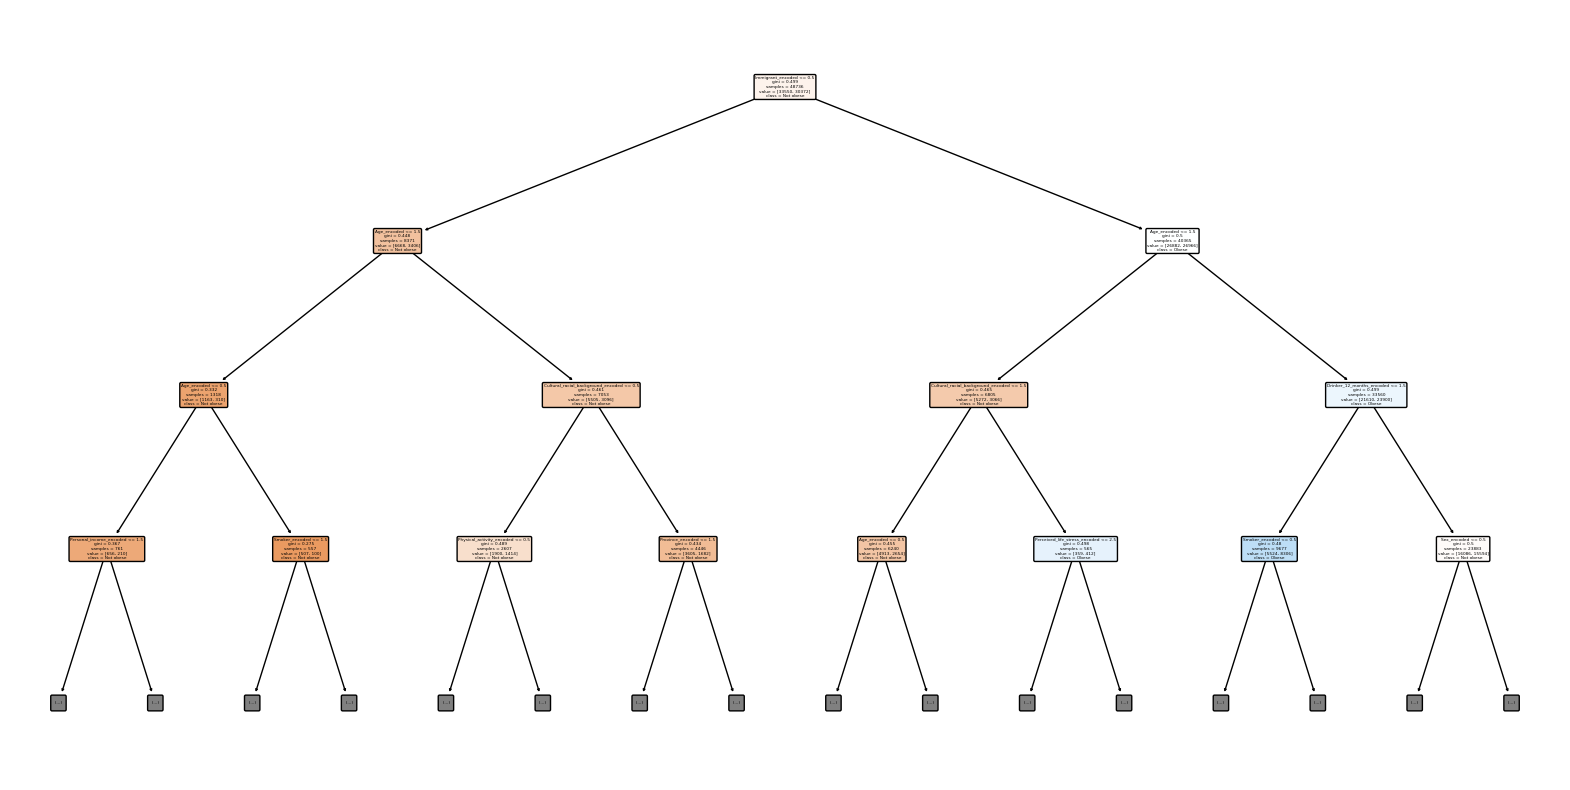

In [41]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))  
plot_tree(model, filled=True, rounded=True, 
          class_names=model.classes_, 
          feature_names=X_train.columns, 
          max_depth=3)  # Limit depth for larger trees; remove for full tree
plt.show()

In [42]:
feature_importances = model.feature_importances_
feature_importance_pairs = [(feature, importance) for feature, importance in zip(X_test.columns, feature_importances)]
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

Feature Importances:
Age_encoded: 0.157527466440598
Personal_income_encoded: 0.13901028990268982
Province_encoded: 0.1301916655861841
Perceived_life_stress_encoded: 0.12777695909209022
Marital_status_encoded: 0.09858242879181503
Physical_activity_encoded: 0.056857079475005554
Education_level_encoded: 0.052679482275969386
Smoker_encoded: 0.037724955115676334
Drinker_12_months_encoded: 0.03695311853448837
Cultural_racial_background_encoded: 0.03212732469254209
Has_regular_healthcare_provider_encoded: 0.03197949039220086
Working_12_months_encoded: 0.03162343701032256
Food_security_encoded: 0.025941559952694086
Sex_encoded: 0.024855899248940595
Immigrant_encoded: 0.016168843488782832


## Second model using parameter grid 

In [80]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [{ 'Not obese': 1, 'Obese': w} for w in [1, 2, 3, 4, 5, 10]]  # Example ratio adjustments
}

In [81]:
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters, including class weights
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy):", grid_search.best_score_)

# Use the best estimator directly
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'class_weight': {'Not obese': 1, 'Obese': 1}, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score (accuracy): 0.6832731883581152
Accuracy on test set: 0.6839297439264609


Accuracy on test set: 0.6839297439264609
Precision: 0.4872364039955605
Recall: 0.11468129571577848
F1 Score: 0.18566293085218863
ROC AUC: 0.6199920073200269


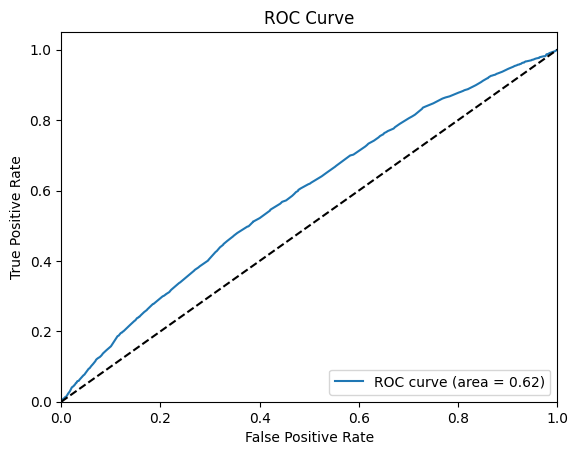

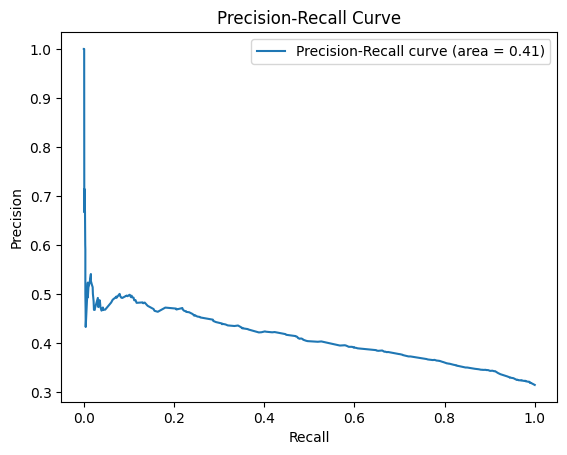

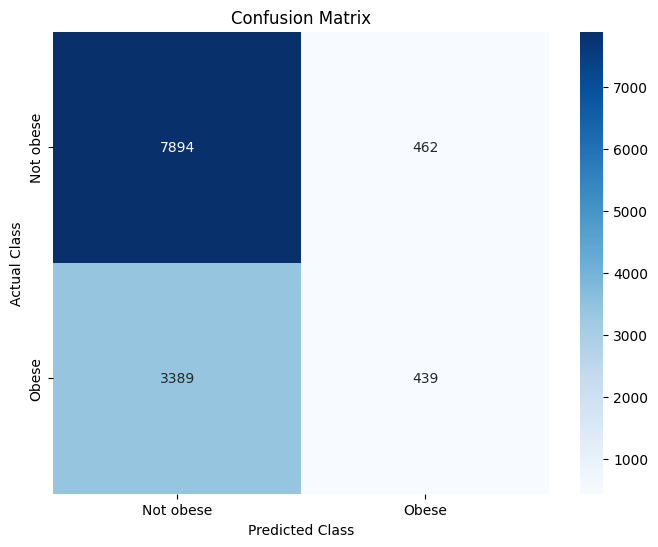

In [82]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred, pos_label='Obese')  
recall = recall_score(y_test, y_pred, pos_label='Obese')
f1 = f1_score(y_test, y_pred, pos_label='Obese')
roc_auc = roc_auc_score(y_test, y_pred_proba)  

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='Obese')
# Calculate the area under the curve as a measure of model performance
pr_auc = auc(recall, precision)

# Plotting the Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


# COnfusion matrix for best_model and heatmap
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

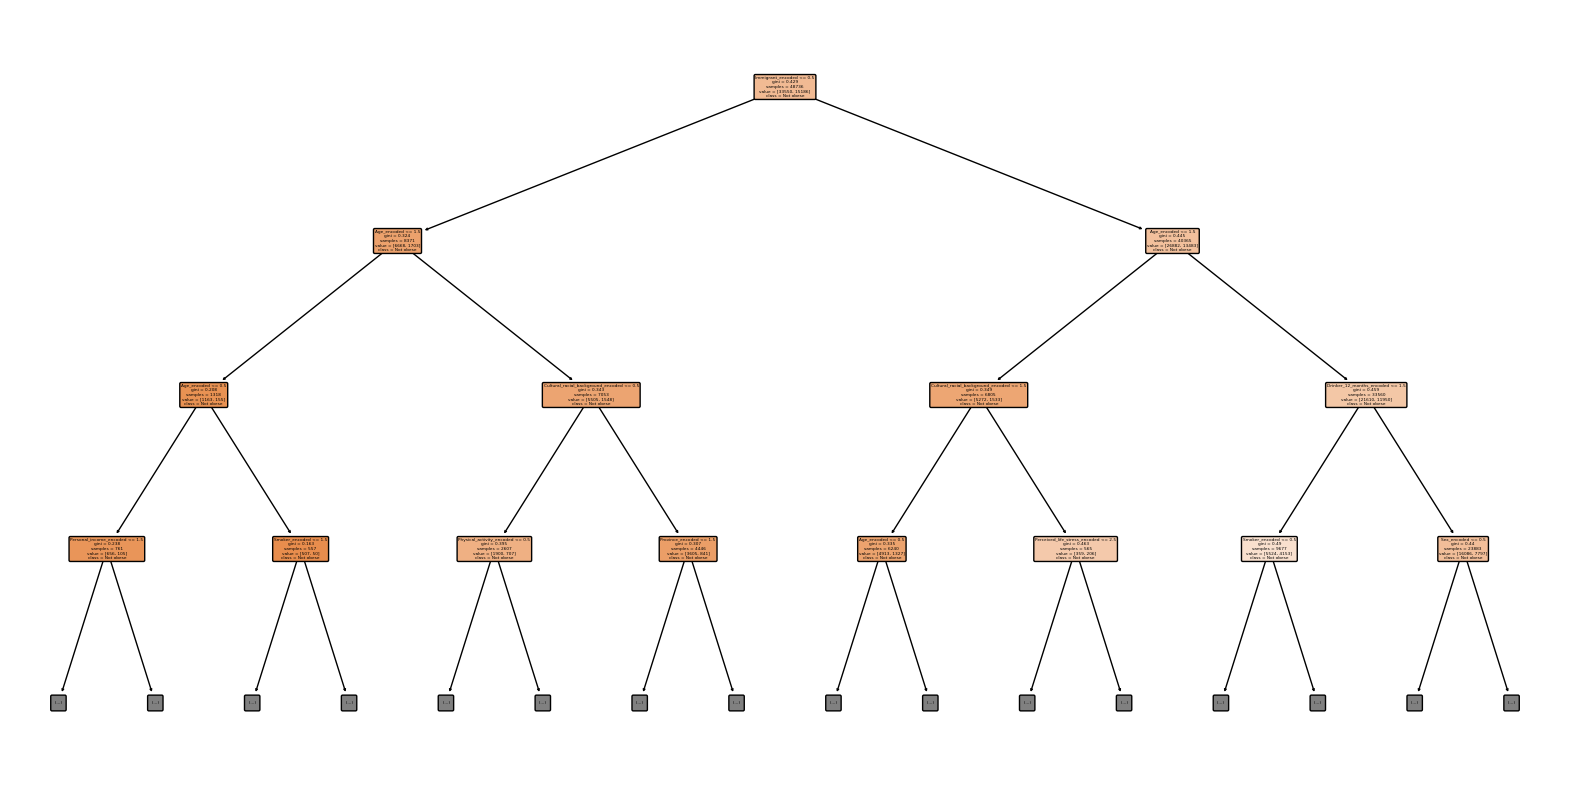

In [57]:
# Visualize the DT
plt.figure(figsize=(20, 10))  
plot_tree(best_model, filled=True, rounded=True, 
          class_names=model.classes_, 
          feature_names=X_train.columns, 
          max_depth=3)  
plt.show()

Interpretation:
The best cross-validation score and the accuracy on the test set are both approximately 68.3%, which represents a good performance and suggests that the model is adjusting well from the training data to unseen data.

Pruning: The choice of max_depth and min_samples_leaf as non-default values indicates that controlling or "Pruning" the complexity of the Decision Tree was crucial for improving the performance on the dataset.

Recursive Feature Elimination (RFE) to identify which features contribute the most to predicting the target and which to drop:

## Third model using Recursive Feature Elimination to identify features to drop

In [67]:
model_3 = DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2})

rfe = RFE(estimator=model, n_features_to_select=6)

In [68]:
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2}),
    n_features_to_select=6)

In [69]:
selected_features = rfe.support_
#if marked True are selected by RFE as the most important:
print(selected_features)

[ True False  True  True False False  True False False  True False False
 False False  True]


In [70]:
# Print the selected features of RFE that are important
print(X_train.columns[selected_features])

Index(['Province_encoded', 'Marital_status_encoded', 'Age_encoded',
       'Perceived_life_stress_encoded', 'Physical_activity_encoded',
       'Personal_income_encoded'],
      dtype='object')


In [71]:
# Filter the training and test sets to include only the selected features
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

In [72]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Consider using other scoring metrics as well
                           n_jobs=-1,  # Use all available cores
                           verbose=1)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy):", grid_search.best_score_)

best_model_3 = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score (accuracy): 0.6798259485710678


Accuracy on test set: 0.6801543007222587
Precision: 0.43783783783783786
Recall: 0.06347962382445141
F1 Score: 0.1108829568788501
ROC AUC: 0.5861948759562079


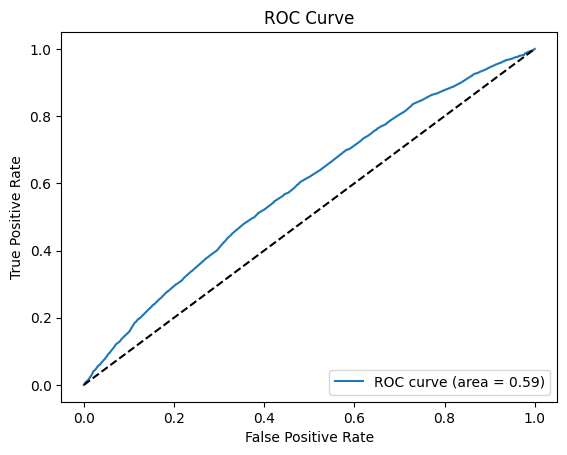

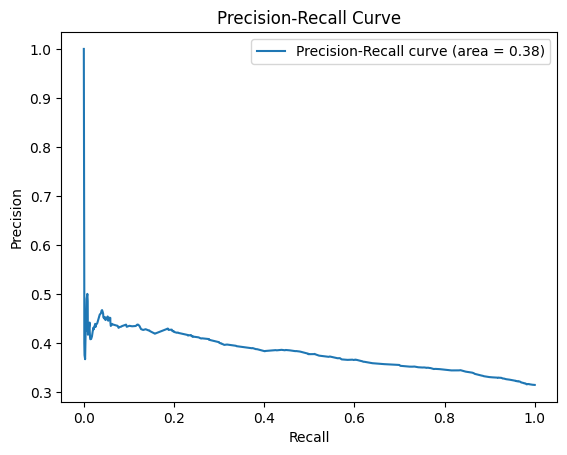

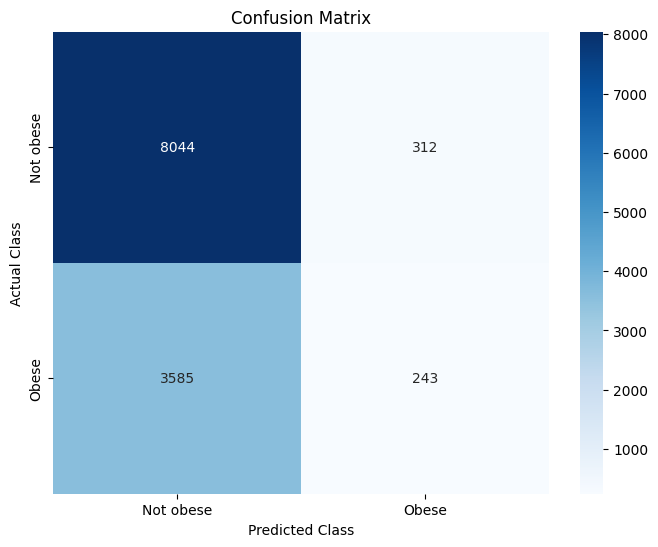

In [73]:
# Re-train the best_model_3 using only the selected features
best_model_3.fit(X_train_selected, y_train)

# Make predictions and evaluate the best_model_3 as before
y_pred = best_model_3.predict(X_test_selected)
y_pred_proba = best_model_3.predict_proba(X_test_selected)[:, 1] 


precision = precision_score(y_test, y_pred, pos_label='Obese')
recall = recall_score(y_test, y_pred, pos_label='Obese')
f1 = f1_score(y_test, y_pred, pos_label='Obese')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


# ROC Curve:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Obese')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label='Obese')
avg_precision = average_precision_score(y_test, y_pred_proba, pos_label='Obese')

plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model_3.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=best_model_3.classes_, yticklabels=best_model_3.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Precision
Second Model: 0.487
Third Model: 0.437
My second model has a higher precision than the third model. This means that, of all instances classified as positive ('Obese'), a higher percentage were correctly classified in the second model.

Recall
Second Model: 0.115
Third Model: 0.063
My third model has a lower recall than the second model, indicating it was worse at identifying all relevant instances of the 'Obese' class.

F1 Score
Second Model: 0.186
Third Model: 0.11
The F1 score, which is the harmonic mean of precision and recall, is lower in the third model. This suggests a worse balance between precision and recall.

ROC AUC
Second Model: 0.620
Third Model: 0.586
The Area Under the ROC Curve (ROC AUC) has decreased in my third model. The ROC AUC score is a performance measurement for the classification problems at various threshold settings. A higher score represents a model's better capability to distinguish between positive and negative classes. The third model is less effective at this.

Precision-Recall Curve Area
Second Model: 0.41
Third Model: 0.38
The area under the Precision-Recall curve has also decreased, indicating that the third model, despite having a better recall, has a lower overall effectiveness in terms of precision across different thresholds.

Overall Assessment
The reduction in precision and ROC AUC suggests that RFE made the model become worse at identifying true positives and it became less precise and less capable of distinguishing between the positive and negative classes overall.The decrease in ROC AUC and precision-recall area is significant because these metrics provide a more nuanced view of model performance across various thresholds.

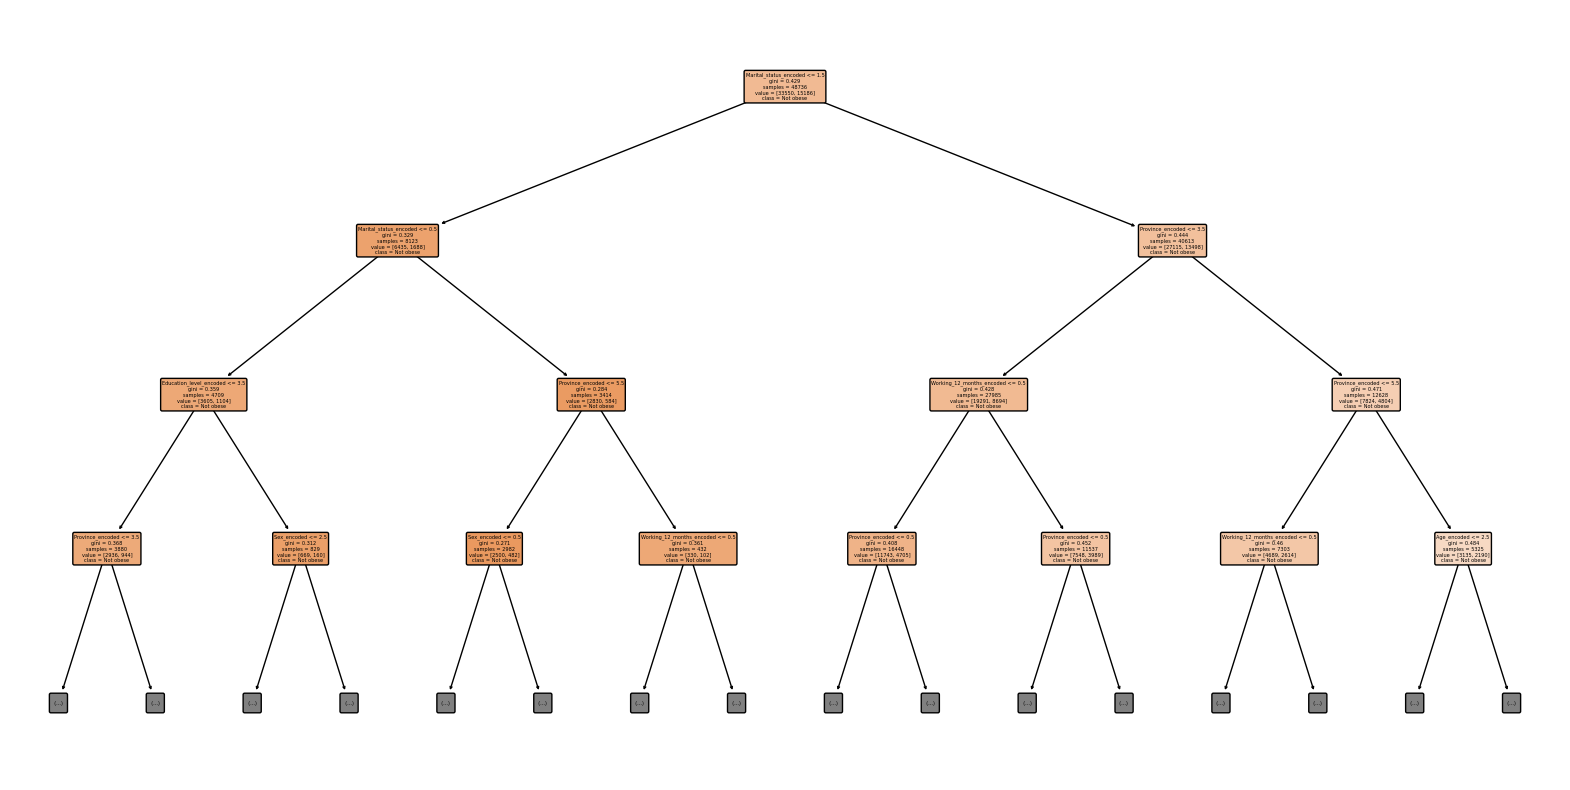

In [74]:
# Visualize the DT
plt.figure(figsize=(20, 10))  
plot_tree(best_model_3, filled=True, rounded=True, 
          class_names=model.classes_, 
          feature_names=X_train.columns, 
          max_depth=3)  
plt.show()

## Fourth Model, attempting RFECV to find optimal number of Features

c:\Users\dusti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


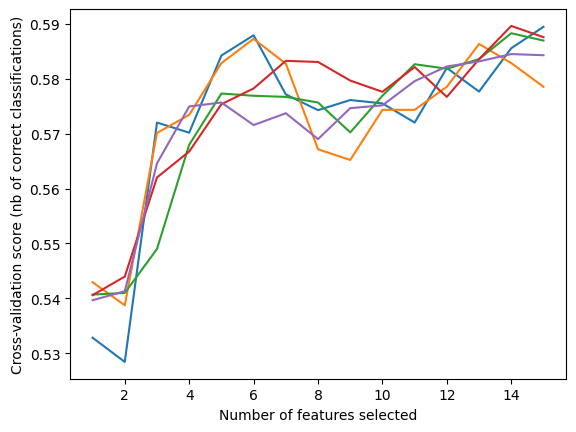

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X_ordinal_encoded_df, y, test_size=0.2, random_state=42)


model_4 = DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2}, random_state=42)
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)  

# Initialize RFECV
rfecv = RFECV(estimator=DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2}, random_state=42),
              step=1,
              cv=StratifiedKFold(5),
              scoring='accuracy')  # can chang eto f1 if want later

# fit RFECV on training data
rfecv.fit(X_train, y_train)

# plot the CV score vs number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [78]:
# Select Features Based on RFECV 
selected_features = rfecv.support_
print(selected_features)

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True]


In [79]:
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Re-training model using only the selected features
model_optimized = DecisionTreeClassifier(class_weight={'Not obese': 1, 'Obese': 2}, random_state=42)
model_optimized.fit(X_train_selected, y_train)

y_pred_optimized = model_optimized.predict(X_test_selected)
y_pred_proba_optimized = model_optimized.predict_proba(X_test_selected)[:, 1]


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Precision:", precision_score(y_test, y_pred_optimized, pos_label='Obese'))
print("Recall:", recall_score(y_test, y_pred_optimized, pos_label='Obese'))
print("F1 Score:", f1_score(y_test, y_pred_optimized, pos_label='Obese'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_optimized))

Accuracy: 0.5844550229809586
Precision: 0.3479438561930559
Recall: 0.36912225705329155
F1 Score: 0.3582203067562429
ROC AUC Score: 0.5267097319741714


## Model Comparisons

### Accuracy:
The second model has the highest accuracy, suggesting it correctly predicts both "Obese" and "Not obese" classes more often than the other models.
The third model shows a slight decrease in accuracy compared to the second.
The fourth model has a significant drop in accuracy, indicating a higher overall rate of misclassification.

### Precision (Positive Predictive Value):
The second model demonstrates the highest precision, indicating that when it predicts "Obese," those predictions are correct a higher percentage of the time compared to the other models.

### Recall (Sensitivity or True Positive Rate):
The second model has a lower recall, suggesting it misses a significant number of true "Obese" cases.
The third model has even lower recall, indicating it fails to identify a larger fraction of actual "Obese" cases.
The fourth model shows a marked improvement in recall, indicating it is better at identifying true "Obese" cases, even though it also has more false positives (as suggested by its lower precision).

### F1 Score:
The F1 score, which balances precision and recall, is highest in the second model, indicating a better overall balance.

### ROC AUC:
The second model has the highest ROC AUC, indicating the best capability among the models to distinguish between the "Obese" and "Not obese" classes.


### Overall: 
The second model appears to perform the best in terms of accuracy and ROC AUC, making it potentially the best choice if the goal is to maximize overall prediction accuracy and the ability to distinguish between classes.